# VISUALIZATION & COMPARISON of  AQI data


# Importing libraries

In [1]:
import missingno as msno
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 733.8 kB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



**The data set we choose contains AQI (Air Quality Index) data at hourly and daily level of some of the cities in India.**

In [2]:
import pandas as pd
df = pd.read_csv('../input/aqi-delhi-vizag-bengaluru/final_v2.csv')
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0     Visakhapatnam  01-07-2016  44.92  82.50  16.75  56.96  40.24  62.45   
1     Visakhapatnam  02-07-2016    NaN    NaN    NaN    NaN    NaN    NaN   
2     Visakhapatnam  03-07-2016    NaN    NaN    NaN    NaN    NaN    NaN   
3     Visakhapatnam  04-07-2016    NaN    NaN    NaN    NaN    NaN    NaN   
4     Visakhapatnam  05-07-2016  17.00  68.00   7.32  25.08  17.66  15.80   
...             ...         ...    ...    ...    ...    ...    ...    ...   
4745      Bengaluru  27-06-2020  16.60  29.48   3.06  13.68  13.07   6.88   
4746      Bengaluru  28-06-2020  20.44  26.34   2.69  10.33  10.58   6.58   
4747      Bengaluru  29-06-2020  28.68  29.27   3.62  12.12  12.94   6.80   
4748      Bengaluru  30-06-2020  14.47  24.26   4.61  12.69  15.00   6.82   
4749      Bengaluru  01-07-2020  17.50  30.48   3.95  13.25  14.83   7.42   

        CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0     1.00  38.67  10.45     6.43    12.50    3.42   NaN           NaN  
1      NaN    NaN    NaN      NaN      NaN     NaN   NaN           NaN  
2      NaN    NaN    NaN      NaN      NaN     NaN   NaN           NaN  
3      NaN    NaN    NaN      NaN      NaN     NaN   NaN           NaN  
4     0.66  20.08  30.54     2.96     7.80    3.12   NaN           NaN  
...    ...    ...    ...      ...      ...     ...   ...           ...  
4745  0.67   7.29  15.69     0.21     1.18     NaN  51.0  Satisfactory  
4746  0.66   6.60  17.59     0.12     0.94     NaN  61.0  Satisfactory  
4747  0.56   6.33  16.99     0.17     1.17     NaN  65.0  Satisfactory  
4748  0.56   6.45  16.08     0.18     0.86     NaN  63.0  Satisfactory  
4749  0.54   6.66  15.40     0.27     0.65     NaN  43.0          Good  

[4750 rows x 16 columns]

Visualizing first 5 rows of our dataset

In [3]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx    NH3    CO  \
0  Visakhapatnam  01-07-2016  44.92  82.5  16.75  56.96  40.24  62.45  1.00   
1  Visakhapatnam  02-07-2016    NaN   NaN    NaN    NaN    NaN    NaN   NaN   
2  Visakhapatnam  03-07-2016    NaN   NaN    NaN    NaN    NaN    NaN   NaN   
3  Visakhapatnam  04-07-2016    NaN   NaN    NaN    NaN    NaN    NaN   NaN   
4  Visakhapatnam  05-07-2016  17.00  68.0   7.32  25.08  17.66  15.80  0.66   

     SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  38.67  10.45     6.43     12.5    3.42  NaN        NaN  
1    NaN    NaN      NaN      NaN     NaN  NaN        NaN  
2    NaN    NaN      NaN      NaN     NaN  NaN        NaN  
3    NaN    NaN      NaN      NaN     NaN  NaN        NaN  
4  20.08  30.54     2.96      7.8    3.12  NaN        NaN

Describe haelps us review details of each parameter such as max - min values , mean , median , mode , etc

In [4]:
df.describe()

PM2.5         PM10           NO          NO2          NOx  \
count  4451.000000  4399.000000  4516.000000  4494.000000  4708.000000   
mean     69.370200   143.498136    21.769843    39.490828    33.447891   
std      67.296772   106.459541    26.198869    20.221519    28.406600   
min       1.720000     8.160000     0.400000     0.170000     0.000000   
25%      28.905000    72.710000     7.040000    25.982500    15.780000   
50%      46.600000   106.220000    12.530000    34.775000    27.765000   
75%      80.410000   180.740000    24.450000    48.585000    44.132500   
max     685.360000   796.880000   221.030000   162.500000   213.610000   

               NH3           CO          SO2           O3     Benzene  \
count  4328.000000  4707.000000  4407.000000  4300.000000  4567.00000   
mean     25.919064     1.016495    11.347756    40.954253     2.84527   
std      17.036901     1.229725     8.216450    24.752926     2.51363   
min       0.080000     0.000000     0.870000     1.380000     0.00000   
25%      12.580000     0.670000     5.440000    23.820000     0.78000   
50%      23.060000     0.910000     8.720000    36.780000     2.28000   
75%      36.052500     1.170000    15.130000    52.095000     4.34500   
max     120.070000    47.930000    71.560000   257.730000    27.62000   

           Toluene       Xylene          AQI  
count  4630.000000  2439.000000  4429.000000  
mean     10.218235     2.028335   157.050576  
std      12.596774     2.585562   111.019482  
min       0.000000     0.000000    20.000000  
25%       1.770000     0.270000    81.000000  
50%       6.150000     1.130000   112.000000  
75%      13.637500     2.945000   200.000000  
max     103.000000    32.470000   716.000000

# **Data Preparation and Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        4750 non-null   object 
 1   Date        4750 non-null   object 
 2   PM2.5       4451 non-null   float64
 3   PM10        4399 non-null   float64
 4   NO          4516 non-null   float64
 5   NO2         4494 non-null   float64
 6   NOx         4708 non-null   float64
 7   NH3         4328 non-null   float64
 8   CO          4707 non-null   float64
 9   SO2         4407 non-null   float64
 10  O3          4300 non-null   float64
 11  Benzene     4567 non-null   float64
 12  Toluene     4630 non-null   float64
 13  Xylene      2439 non-null   float64
 14  AQI         4429 non-null   float64
 15  AQI_Bucket  4429 non-null   object 
dtypes: float64(13), object(3)
memory usage: 593.9+ KB


# Lets Check For Missing Values

<AxesSubplot:>

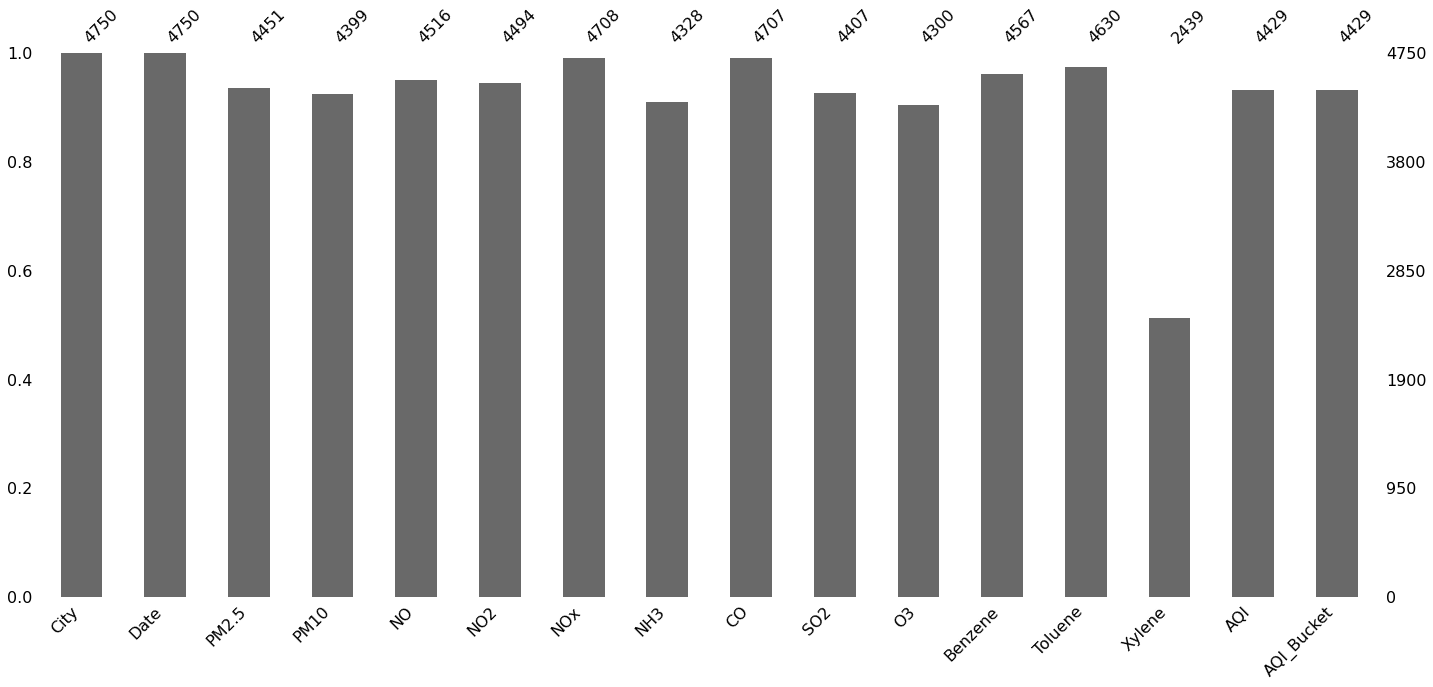

In [6]:
msno.bar(df)

Plotting heatmap to infere the correlation between various parameter in our dataset.

<AxesSubplot:>

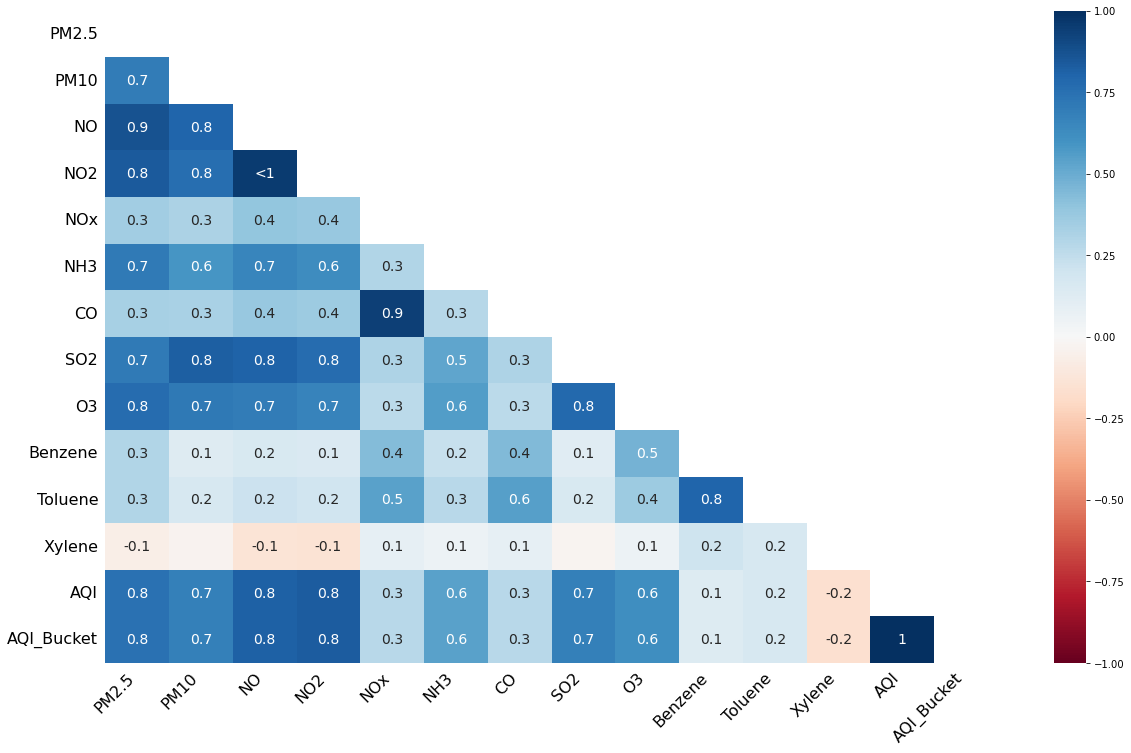

In [7]:
msno.heatmap(df)

<AxesSubplot:>

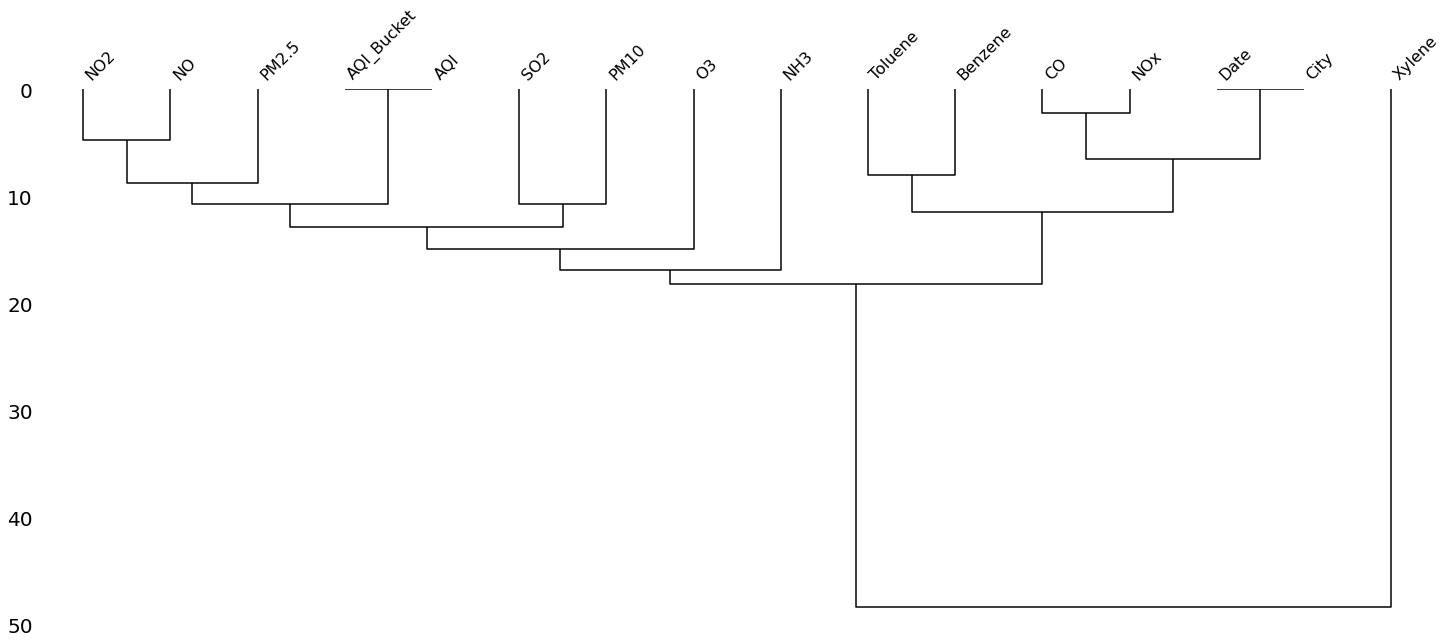

In [8]:
msno.dendrogram(df)

****AQI and AQI_bucket are at same level as each directly computed from each other
AQI computed from all others therefore at top.
Shows some pseudo relationships also like Xylene missing value affects other missing values
ML tip- use your brain do not trust raw correlations & correlation does not imply causality.****

**Observing the data set , our team found out , there are missing values which are being replaced by medians of the respective columns.**

# Data Cleaning and Processing

In [9]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')
df_without_categ = df.drop(columns = ['City','Date','AQI_Bucket'])
df_without_categ

PM2.5    PM10     NO     NO2     NOx    NH3    CO    SO2     O3  \
0     44.92   82.50  16.75  56.960  40.240  62.45  1.00  38.67  10.45   
1     46.60  106.22  12.53  34.775  27.765  23.06  0.91   8.72  36.78   
2     46.60  106.22  12.53  34.775  27.765  23.06  0.91   8.72  36.78   
3     46.60  106.22  12.53  34.775  27.765  23.06  0.91   8.72  36.78   
4     17.00   68.00   7.32  25.080  17.660  15.80  0.66  20.08  30.54   
...     ...     ...    ...     ...     ...    ...   ...    ...    ...   
4745  16.60   29.48   3.06  13.680  13.070   6.88  0.67   7.29  15.69   
4746  20.44   26.34   2.69  10.330  10.580   6.58  0.66   6.60  17.59   
4747  28.68   29.27   3.62  12.120  12.940   6.80  0.56   6.33  16.99   
4748  14.47   24.26   4.61  12.690  15.000   6.82  0.56   6.45  16.08   
4749  17.50   30.48   3.95  13.250  14.830   7.42  0.54   6.66  15.40   

      Benzene  Toluene  Xylene    AQI  
0        6.43    12.50    3.42  112.0  
1        2.28     6.15    1.13  112.0  
2        2.28     6.15    1.13  112.0  
3        2.28     6.15    1.13  112.0  
4        2.96     7.80    3.12  112.0  
...       ...      ...     ...    ...  
4745     0.21     1.18    1.13   51.0  
4746     0.12     0.94    1.13   61.0  
4747     0.17     1.17    1.13   65.0  
4748     0.18     0.86    1.13   63.0  
4749     0.27     0.65    1.13   43.0  

[4750 rows x 13 columns]

<AxesSubplot:>

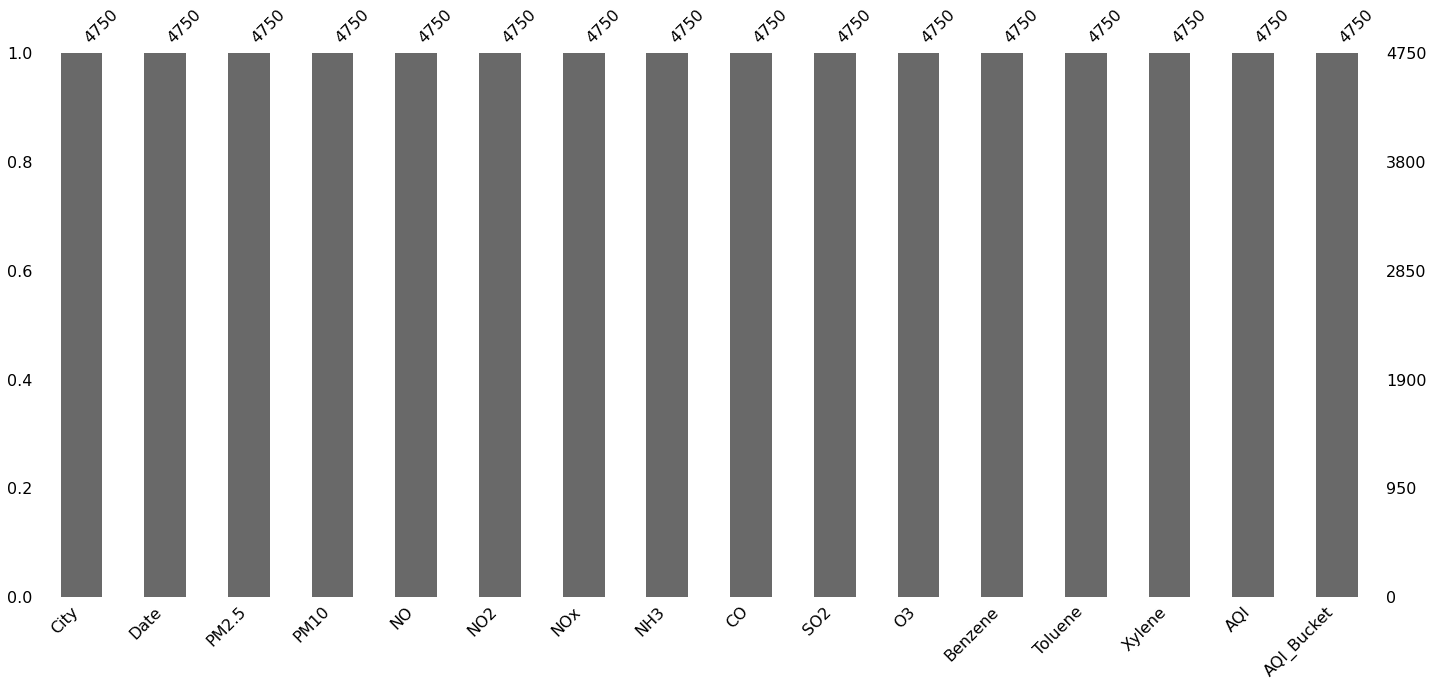

In [10]:
msno.bar(df)

In [11]:
df

City        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0     Visakhapatnam  01-07-2016  44.92   82.50  16.75  56.960  40.240  62.45   
1     Visakhapatnam  02-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
2     Visakhapatnam  03-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
3     Visakhapatnam  04-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
4     Visakhapatnam  05-07-2016  17.00   68.00   7.32  25.080  17.660  15.80   
...             ...         ...    ...     ...    ...     ...     ...    ...   
4745      Bengaluru  27-06-2020  16.60   29.48   3.06  13.680  13.070   6.88   
4746      Bengaluru  28-06-2020  20.44   26.34   2.69  10.330  10.580   6.58   
4747      Bengaluru  29-06-2020  28.68   29.27   3.62  12.120  12.940   6.80   
4748      Bengaluru  30-06-2020  14.47   24.26   4.61  12.690  15.000   6.82   
4749      Bengaluru  01-07-2020  17.50   30.48   3.95  13.250  14.830   7.42   

        CO    SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0     1.00  38.67  10.45     6.43    12.50    3.42  112.0      Moderate  
1     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
2     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
3     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
4     0.66  20.08  30.54     2.96     7.80    3.12  112.0      Moderate  
...    ...    ...    ...      ...      ...     ...    ...           ...  
4745  0.67   7.29  15.69     0.21     1.18    1.13   51.0  Satisfactory  
4746  0.66   6.60  17.59     0.12     0.94    1.13   61.0  Satisfactory  
4747  0.56   6.33  16.99     0.17     1.17    1.13   65.0  Satisfactory  
4748  0.56   6.45  16.08     0.18     0.86    1.13   63.0  Satisfactory  
4749  0.54   6.66  15.40     0.27     0.65    1.13   43.0          Good  

[4750 rows x 16 columns]

In [12]:
df.sort_values(by=['City','Date'])
df

City        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0     Visakhapatnam  01-07-2016  44.92   82.50  16.75  56.960  40.240  62.45   
1     Visakhapatnam  02-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
2     Visakhapatnam  03-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
3     Visakhapatnam  04-07-2016  46.60  106.22  12.53  34.775  27.765  23.06   
4     Visakhapatnam  05-07-2016  17.00   68.00   7.32  25.080  17.660  15.80   
...             ...         ...    ...     ...    ...     ...     ...    ...   
4745      Bengaluru  27-06-2020  16.60   29.48   3.06  13.680  13.070   6.88   
4746      Bengaluru  28-06-2020  20.44   26.34   2.69  10.330  10.580   6.58   
4747      Bengaluru  29-06-2020  28.68   29.27   3.62  12.120  12.940   6.80   
4748      Bengaluru  30-06-2020  14.47   24.26   4.61  12.690  15.000   6.82   
4749      Bengaluru  01-07-2020  17.50   30.48   3.95  13.250  14.830   7.42   

        CO    SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0     1.00  38.67  10.45     6.43    12.50    3.42  112.0      Moderate  
1     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
2     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
3     0.91   8.72  36.78     2.28     6.15    1.13  112.0      Moderate  
4     0.66  20.08  30.54     2.96     7.80    3.12  112.0      Moderate  
...    ...    ...    ...      ...      ...     ...    ...           ...  
4745  0.67   7.29  15.69     0.21     1.18    1.13   51.0  Satisfactory  
4746  0.66   6.60  17.59     0.12     0.94    1.13   61.0  Satisfactory  
4747  0.56   6.33  16.99     0.17     1.17    1.13   65.0  Satisfactory  
4748  0.56   6.45  16.08     0.18     0.86    1.13   63.0  Satisfactory  
4749  0.54   6.66  15.40     0.27     0.65    1.13   43.0          Good  

[4750 rows x 16 columns]

In [13]:
df_delhi=df.loc[df['City']=="Delhi"]
df_vizag=df.loc[df['City']=="Vishakhapatnam"]
df_bng=df.loc[df['City']=="Bengaluru"]
df_delhi_without_categ = df_delhi.drop(columns = ['City','Date','AQI_Bucket'])
df_vizag_without_categ = df_vizag.drop(columns = ['City','Date','AQI_Bucket'])
df_bng_without_categ = df_bng.drop(columns = ['City','Date','AQI_Bucket'])



PLotting outliers using scatter plot

In [14]:
fig = go.Figure()

for col in df_delhi_without_categ:
  fig.add_trace(go.Box( y=df_delhi_without_categ[col].values,quartilemethod="linear" ,name=df_delhi_without_categ[col].name))
  
fig.show()

In [15]:
fig = go.Figure()

for col in df_delhi_without_categ:
  fig.add_trace(go.Box( y=df_bng_without_categ[col].values,quartilemethod="linear" ,name=df_bng_without_categ[col].name))
  
fig.show()

In [16]:

z=np.abs(stats.zscore(df_without_categ,nan_policy='omit'))
z_del=np.abs(stats.zscore(df_delhi_without_categ,nan_policy='omit'))
z_vizag=np.abs(stats.zscore(df_vizag_without_categ,nan_policy='omit'))
z_bng=np.abs(stats.zscore(df_bng_without_categ,nan_policy='omit'))
# df = df.loc[(z<2).all(axis=1)]
df_delhi_cleaned_without_categ = df_delhi_without_categ[(z < 2).all(axis=1)]
df_vizag_cleaned_without_categ = df_delhi_without_categ[(z < 2).all(axis=1)]
df_bng_cleaned_without_categ = df_delhi_without_categ[(z < 2).all(axis=1)]
df_delhi_cleaned_without_categ.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 1477 to 3105
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    993 non-null    float64
 1   PM10     993 non-null    float64
 2   NO       993 non-null    float64
 3   NO2      993 non-null    float64
 4   NOx      993 non-null    float64
 5   NH3      993 non-null    float64
 6   CO       993 non-null    float64
 7   SO2      993 non-null    float64
 8   O3       993 non-null    float64
 9   Benzene  993 non-null    float64
 10  Toluene  993 non-null    float64
 11  Xylene   993 non-null    float64
 12  AQI      993 non-null    float64
dtypes: float64(13)
memory usage: 108.6 KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [17]:
df_delhi_cleaned_without_categ

PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
1477  138.86  220.21  16.26  41.92  56.84  35.05  1.55  11.25  67.40     2.31   
1478  179.48  268.50  24.14  58.56  75.29  35.01  1.45  15.89  78.01     2.21   
1513   76.12  137.44   9.77  30.51  38.62  47.95  1.00  10.43  73.20     3.07   
1514   88.73  137.44  12.59  41.47  48.81  30.92  1.02  20.79  75.96     3.48   
1526   53.00  129.37   9.63  48.15  48.15  31.60  0.73  19.05  84.88     1.82   
...      ...     ...    ...    ...    ...    ...   ...    ...    ...      ...   
3101   39.80  155.94  10.88  21.46  22.47  31.43  0.87  10.38  18.88     1.69   
3102   59.52  308.65  12.67  21.60  23.86  29.27  0.94  10.70  18.05     1.71   
3103   44.86  184.12  10.50  21.57  21.94  27.97  0.88  11.58  26.61     2.13   
3104   39.80   91.98   5.99  17.96  15.44  28.48  0.84  10.51  37.29     1.57   
3105   54.01  128.66   6.33  21.05  16.81  29.06  0.97  11.15  29.73     2.03   

      Toluene  Xylene    AQI  
1477     4.48    1.13  311.0  
1478     4.79    1.13  321.0  
1513     6.16    1.13  228.0  
1514     4.69    1.13  213.0  
1526     4.78    1.13  214.0  
...       ...     ...    ...  
3101    19.99    0.43  112.0  
3102    25.13    1.74  196.0  
3103    23.80    1.13  233.0  
3104    16.37    0.49  114.0  
3105    23.57    0.65  101.0  

[993 rows x 13 columns]

Data has been cleaned

In [18]:
fig = go.Figure()

for col in df_delhi_without_categ:
  fig.add_trace(go.Box( y=df_delhi_cleaned_without_categ[col].values,quartilemethod="linear" ,name=df_delhi_cleaned_without_categ[col].name))
  
fig.show()

In [19]:
fig = go.Figure()

for col in df_delhi_without_categ:
  fig.add_trace(go.Box( y=df_vizag_cleaned_without_categ[col].values,quartilemethod="linear" ,name=df_vizag_cleaned_without_categ[col].name))
  
fig.show()

In [20]:
fig = go.Figure()

for col in df_delhi_without_categ:
  fig.add_trace(go.Box( y=df_bng_cleaned_without_categ[col].values,quartilemethod="linear" ,name=df_bng_cleaned_without_categ[col].name))
  
fig.show()

# Exploratory Analysis and Visualization

In [21]:
pollutants = ['PM2.5','PM10', 'NO', 'NOx','NO2','CO','NH3','O3','SO2','AQI']
dk = df.set_index('Date')
px.scatter(data_frame=df,x='Date' , y=pollutants)

We observe that a peak occurs in AQI every year in the months around Diwali.

In [22]:
pollutants = ['PM2.5','PM10', 'NO', 'NOx','NO2','CO','NH3','O3','SO2']
dk = df.set_index('AQI')
px.scatter(data_frame=df,x='AQI' , y=pollutants,title="Scatter Plot between AQI and Pollutants")

We observe a high correlation between pollutants and AQI levels which is expected behaviour.

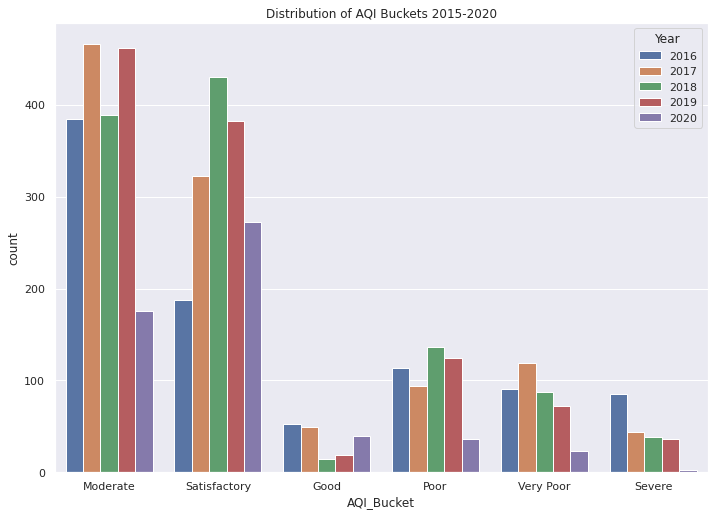

In [23]:
# year vs aqi index
df_with_year=df
df_with_year['Year']=df['Date'].str[6:]
df_with_year
# df_with_year['Year'].value_counts()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Distribution of AQI Buckets 2015-2020')
sns.countplot(x='AQI_Bucket', data=df_with_year, hue='Year');

**Plotly disadvantage not all plots available**

**Also we see the effects of COVID-19 on AQI levels- In 2020 the Moderate and Satisfactory have dipped noticably.**

In [24]:
fig = px.line(df, x='Date', y='AQI', color='City')
fig.show()

**Comparing the 3 Cities and we observe delhi is most polluted and bengaluru is least polluted.**<br> **Also we see there a bump in AQI in the winter months near Diwali**

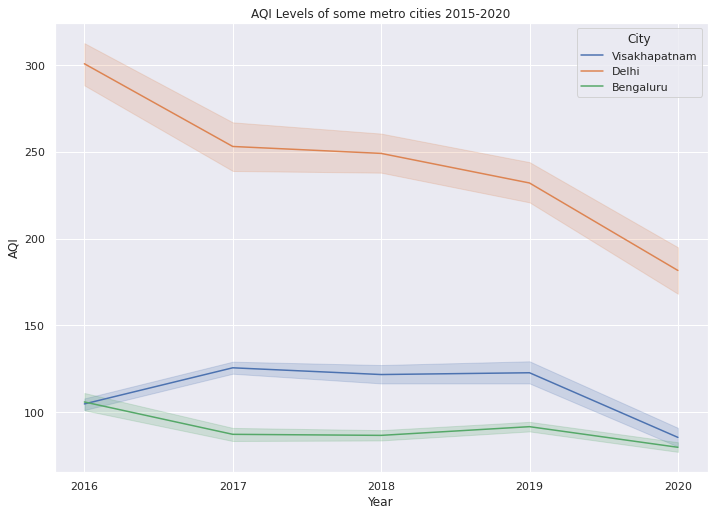

In [25]:
df_with_month = df

df_with_month['Month']=df['Date'].str[3:5]+" "+df['Date'].str[6:]
# plt.title('AQI Levels')
# sns.lineplot(x='Month',y='AQI', data=df_with_month, hue='City');

# data = city_day[(city_day['City'] == 'Mumbai') | (city_day['City'] == 'Delhi') | (city_day['City'] == 'Bengaluru') | (city_day['City'] == 'Ahmedabad') | (city_day['City'] == 'Chennai')]
plt.title('AQI Levels of some metro cities 2015-2020')
sns.lineplot(x='Year',y='AQI', data=df_with_year, hue='City');

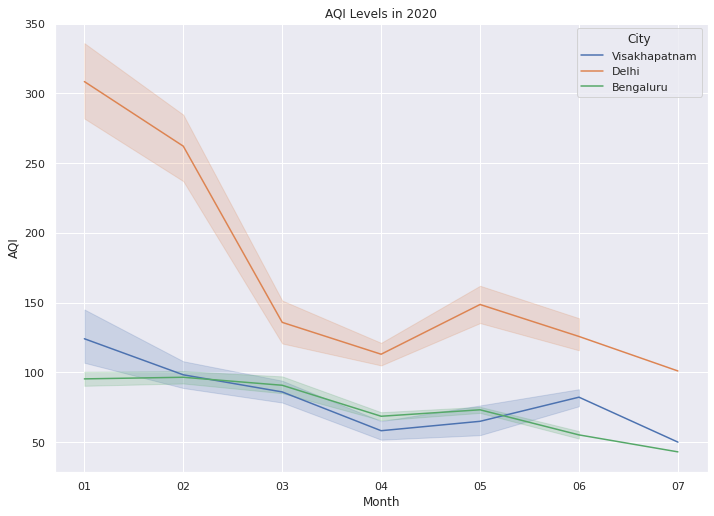

In [26]:
df_2020 = df.loc[df['Year']=='2020']

df_2020['Month']=df['Date'].str[3:5]
plt.title('AQI Levels in 2020')
sns.lineplot(x='Month',y='AQI', data=df_2020, hue='City');

**We see a bigger drop in Delhi in Jan and Feb as winter recedes and wind blow it clears the pollution.**<br>
**Every city has a drop around March & April due to Lockdown.**

In [27]:
co=df[['City','Date','CO']]
no2=df[['City','Date','NO2']]
nox=df[['City','Date','NOx']]
pm10=df[['City','Date','PM10']]
pm25=df[['City','Date','PM2.5']]
so2=df[['City','Date','SO2']]
dfs = [co, no2, nox, pm10, pm25, so2]
names = ['co', 'no2', 'nox', 'pm10', 'pm25', 'so2']
for i, d in enumerate(dfs):
    d.name = names[i]
for d in dfs:
    d.utc = pd.to_datetime(d.Date)
    d['week'] = d.utc.dt.isocalendar().week

co.head()    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



City        Date    CO  week
0  Visakhapatnam  01-07-2016  1.00     1
1  Visakhapatnam  02-07-2016  0.91     5
2  Visakhapatnam  03-07-2016  0.91    10
3  Visakhapatnam  04-07-2016  0.91    14
4  Visakhapatnam  05-07-2016  0.66    18

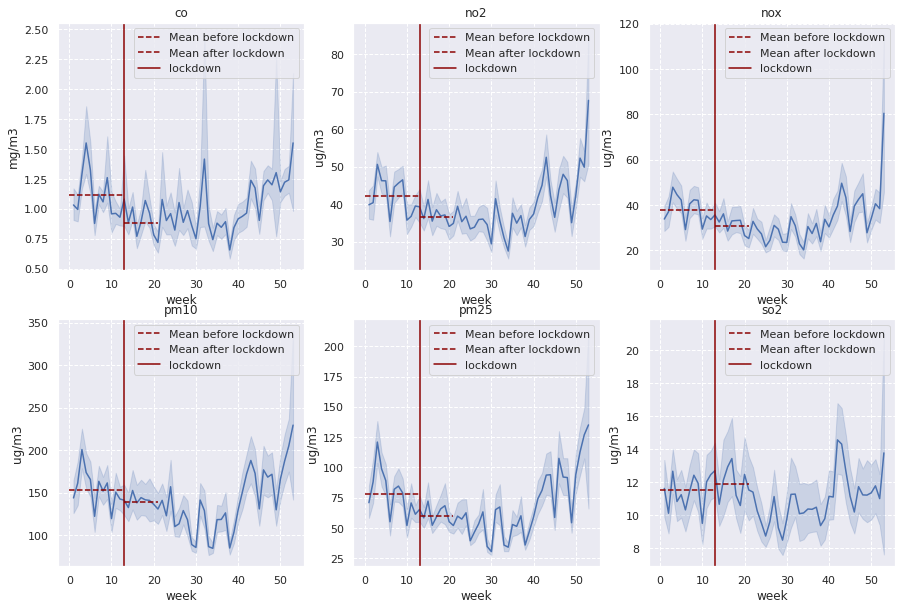

In [28]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
rows, cols = 2, 3
n = 0
for row in range(rows):
    for col in range(cols):
        # plot this year
        if(n == 0):
            sns.lineplot(x=dfs[n].week, y=dfs[n].CO, ax=axes[row,col])
            # set unit as label
            axes[row, col].set_ylabel("mg/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13].CO.mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)].CO.mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 1):
            sns.lineplot(x=dfs[n].week, y=dfs[n].NO2, ax=axes[row,col])  
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13].NO2.mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)].NO2.mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 2):
            sns.lineplot(x=dfs[n].week, y=dfs[n].NOx, ax=axes[row,col])  
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13].NOx.mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)].NOx.mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 3):
            sns.lineplot(x=dfs[n].week, y=dfs[n].PM10, ax=axes[row,col])  
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13].PM10.mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)].PM10.mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 4):
            sns.lineplot(x=dfs[n].week, y=dfs[n]['PM2.5'], ax=axes[row,col])  
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13]['PM2.5'].mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)]['PM2.5'].mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 5):
            sns.lineplot(x=dfs[n].week, y=dfs[n].SO2, ax=axes[row,col])  
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            # mean before lockdown
            axes[row, col].hlines(dfs[n][dfs[n].week<=13].SO2.mean(), 0, 13, color='darkred', linestyle='dashed', label='Mean before lockdown')
            # mean after lockdown
            axes[row, col].hlines(dfs[n][(dfs[n].week>13) & (dfs[n].week<22)].SO2.mean(), 13, 21, color='darkred', linestyle='dashed', label='Mean after lockdown')
            # lockdown line
            axes[row, col].axvline(13, color='darkred', label='lockdown')
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        n+=1

plt.show()

In [29]:
df19 = df[pd.to_datetime(df["Date"]).dt.year == 2019]
co19 = df19[['City','Date', 'CO']]

no219 = df19[['City','Date', 'NO2']]

nox19 = df19[['City','Date', 'NOx']]

pm1019 = df19[['City','Date', 'PM10']]

pm2519 = df19[['City','Date', 'PM2.5']]

so219 = df19[['City','Date', 'SO2']]

dfs19 = [co19, no219, nox19, pm1019, pm2519, so219]
names19 = ['co19', 'no219', 'nox19', 'pm1019', 'pm2519', 'so219']
for i, d in enumerate(dfs19):
    d.name = names19[i]
    
for d in dfs19:
    d.utc = pd.to_datetime(d.Date)
    d['week'] = d.utc.dt.isocalendar().week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



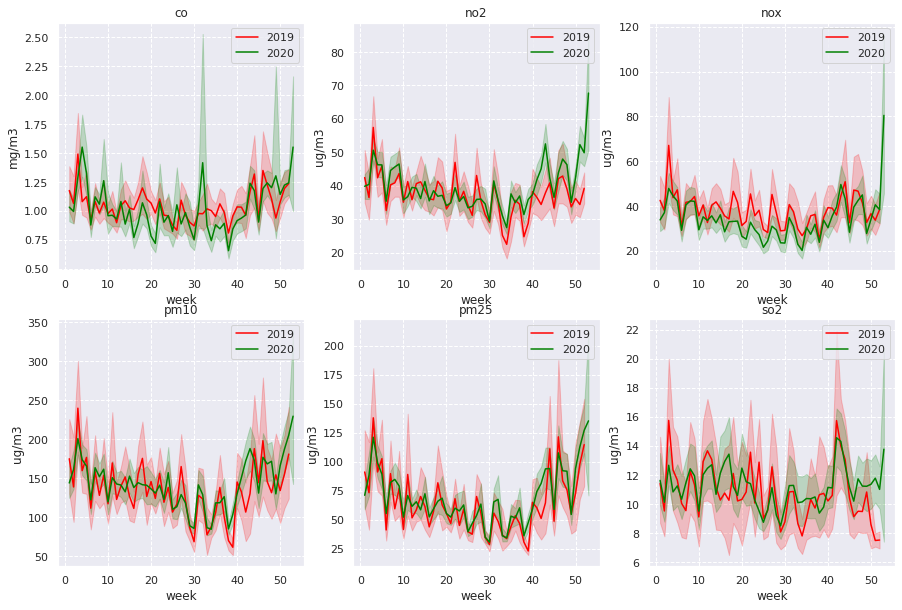

In [30]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
rows, cols = 2, 3
n = 0
for row in range(rows):
    for col in range(cols):
        # plot this year
        if(n == 0):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n].CO, ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n].CO, ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("mg/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 1):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n].NO2, ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n].NO2, ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 2):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n].NOx, ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n].NOx, ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 3):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n].PM10, ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n].PM10, ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 4):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n]['PM2.5'], ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n]['PM2.5'], ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        elif(n == 5):
            sns.lineplot(color = 'red',x=dfs19[n].week, y=dfs19[n].SO2, ax=axes[row,col], label = '2019')
            sns.lineplot(color = 'green',x=dfs[n].week, y=dfs[n].SO2, ax=axes[row,col], label = '2020')
            # set unit as label
            axes[row, col].set_ylabel("ug/m3")
            axes[row, col].set_title(dfs[n].name)
            axes[row, col].grid(linestyle='--')
            axes[row, col].legend()
        n+=1
plt.show()

**All the trends we saw have been explained by real world phenomena**